# Stationarity

### Before testing: look  

For data to be stationary, it must have a dimension with temporal properties (the x-axis in the examples below being time), it must:
- Have a constant mean
- Have a constant variance
- Have no seasonality 

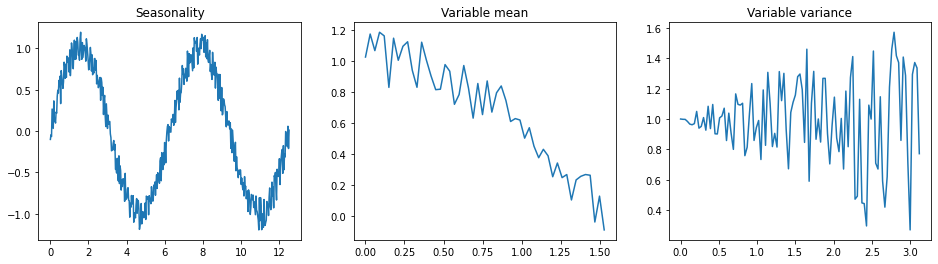

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

time = np.arange(3.14 * 4, step=0.03)
seasonal = np.sin(time) + np.random.uniform(-0.2, 0.2, len(time))
var_mean = np.cos(time[:round(len(time)/8)]) + np.random.uniform(-0.2, 0.2, round(len(time)/8))
var_variance = 1 + (np.random.uniform(-0.3, 0.3, len(time)) * time)

fig, ax = plt.subplots(1, 3, figsize=(16, 4))

sns.lineplot(x=time, y=seasonal, ax=ax[0])
ax[0].set_title("Seasonality")

sns.lineplot(x=time[:round(len(time)/8)], y=var_mean, ax=ax[1])
ax[1].set_title("Variable mean")

sns.lineplot(x=time[:round(len(time)/4)], y=var_variance[:round(len(time)/4)], ax=ax[2])
ax[2].set_title("Variable variance")

plt.plot();

### Augmented Dickey-Fuller Unit Root Test  

Null Hypothesis: 

In [3]:
from statsmodels.tsa.stattools import adfuller
